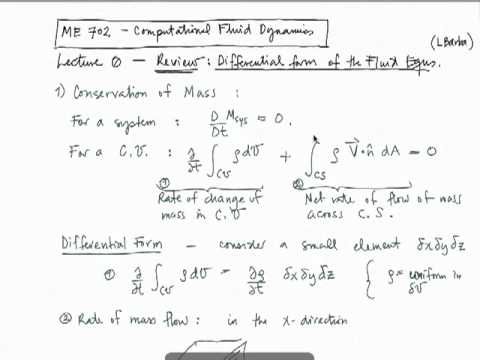

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo('35unQgSaT88')

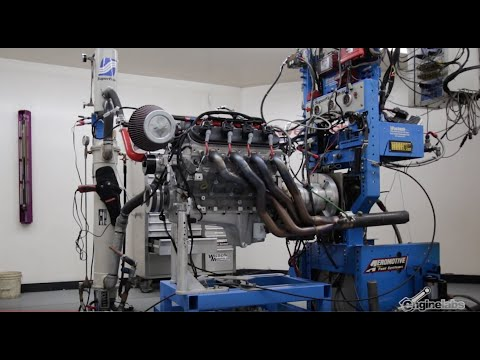

In [4]:
from IPython.display import YouTubeVideo
YouTubeVideo('KFkOy0F5hGg')

In [27]:
%matplotlib inline
import numpy
from matplotlib import pyplot
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [28]:
def rho_green_light(nx, rho_light):
    rho = numpy.arange(nx)*2./nx*rho_light         #Before stoplight
    rho[int((nx-1)/2):]=0
    return rho

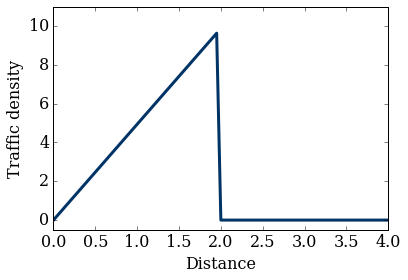

In [29]:
nx=81
nt=30
dx=4.0/(nx-1)
x=numpy.linspace(0, 4, nx)

rho_max=10.
u_max=1.
rho_light=10.
rho = rho_green_light(nx, rho_light)
pyplot.plot(x, rho, color='#003366', ls='-', lw=3)
pyplot.ylabel('Traffic density')
pyplot.xlabel('Distance')
pyplot.ylim(-0.5, 11.);

In [30]:
def computeF(u_max, rho_max, rho):
    return u_max*rho*(1-rho/rho_max)

In [31]:
def ftbs(rho, nt, dt, dx, rho_max, u_max):
    rho_n = numpy.zeros((nt, len(rho)))
    rho_n[0, :] = rho. copy()
    for t in range(1, nt):
        F= computeF(u_max, rho_max, rho)
        rho_n[t, 1:]= rho[1:]- dt/dx*(F[1:]-F[1:])
        rho_n[t, 0]= rho[0]
        rho = rho_n[t].copy()
    return rho_n

In [32]:
sigma=1.
dt=sigma*dx

rho_n=ftbs(rho, nt, dt, dx, rho_max, u_max)

In [33]:
from matplotlib import animation
from IPython.display import HTML

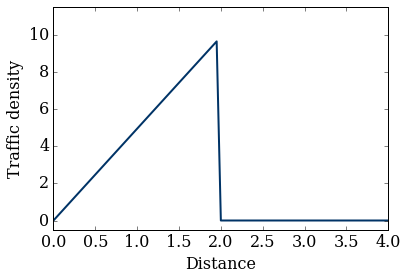

In [34]:
fig = pyplot.figure();
ax = pyplot.axes(xlim=(0,4), ylim=(-.5, 11.5), xlabel=('Distance'), ylabel=('Traffic density'))
line, = ax.plot([], [], color='#003366', lw=2);

def animate(data):
    x= numpy.linspace(0, 4, nx)
    y = data
    line.set_data(x, y)
    return line, 
anim = animation.FuncAnimation(fig, animate, frames=rho_n, interval=1000)

In [35]:
HTML(anim.to_html5_video())